## Task 1

### Problem Statement : Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable

### Dataset used : Global Food Price Inflation

Description:
Food price inflation is an important metric to inform economic policy but traditional sources of consumer prices are often produced with delay during crises and only at an aggregate level. This may poorly reflect the actual price trends in rural or poverty-stricken areas, where large populations reside in fragile situations.
This data set includes Global Food Price Estimates and Inflation by Product, Market, and Country. It helps gain insight into price developments beyond what can be formally measured by traditional methods.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset dataset
data = pd.read_csv("Inflation dataset.csv")
data.head()

,country,iso3,components,currency,start_date_observations,end_date_observations,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,number_of_observations_food,...,total_food_price_increase_since_start_date,average_annualized_food_inflation,maximum_food_drawdown,average_annualized_food_volatility,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,Rsquared_individual_food_items,Rsquared_individual_other_items,index_confidence_score,imputation_model
0,Afghanistan,AFG,"Bread (1 KG, Index Weight = 1), Rice (Low Qual...",AFN,Jan 2007,Sep 2023,40,40,3,"bread: 2318, rice: 2701, wheat: 2682",...,167.97%,6.06%,-40.67%,7.93%,0.62,0.87,"bread: 0.94, rice: 0.89, wheat: 0.93","exchange_rate_wfp: 1, fuel_diesel: 0.97, wage_...",0.92,"bread: cubist (Andree, 2021), rice: two-stage ..."
1,Burundi,BDI,"Bananas (1 KG, Index Weight = 1), Beans (1 KG,...",BIF,Jan 2007,Aug 2023,72,72,10,"bananas: 5344, beans: 5963, cassava_flour: 594...",...,254.94%,7.86%,-30.77%,12.03%,0.60,0.83,"bananas: 0.88, beans: 0.9, cassava_flour: 0.89...",:,0.90,"bananas: two-stage cubist (Andree and Pape, 20..."
2,Burkina Faso,BFA,"Maize (White) (1 KG, Index Weight = 1), Millet...",XOF,Jan 2007,Jul 2023,64,64,3,"maize: 6615, millet: 7618, sorghum: 7177",...,201.25%,6.81%,-36.7%,13.71%,0.57,0.80,"maize: 0.84, millet: 0.83, sorghum: 0.81",:,0.83,"maize: cubist (Andree, 2021), millet: cubist (..."
3,Central African Republic,CAF,"Cassava (Cossette) (1 KG, Index Weight = 1), M...",XAF,Jan 2007,Jun 2023,42,42,5,"cassava: 2259, maize: 2025, meat_beef: 2147, o...",...,134.62%,5.22%,-24.85%,13.74%,0.39,0.59,"cassava: 0.89, maize: 0.88, meat_beef: 0.95, o...",:,0.89,"cassava: cubist (Andree, 2021), maize: cubist ..."
4,Cameroon,CMR,"Bananas (12 KG, Index Weight = 0.08), Cassava ...",XAF,Apr 2010,Aug 2023,83,83,10,"bananas: 621, cassava: 624, cocoyam: 624, fish...",...,39.02%,2.47%,-2.79%,1.84%,0.25,0.67,"bananas: 0.96, cassava: 0.96, cocoyam: 0.98, f...",:,0.98,"bananas: two-stage cubist (Andree and Pape, 20..."


In [3]:
# Check data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   country                                                 25 non-null     object 
 1   iso3                                                    25 non-null     object 
 2   components                                              25 non-null     object 
 3   currency                                                25 non-null     object 
 4   start_date_observations                                 25 non-null     object 
 5   end_date_observations                                   25 non-null     object 
 6   number_of_markets_modeled                               25 non-null     int64  
 7   number_of_markets_covered                               25 non-null     int64  
 8   number_of_food_items                      

In [4]:
# Descriptive statistics
print(data.describe())

       number_of_markets_modeled  number_of_markets_covered  \
count                  25.000000                  25.000000   
mean                   56.480000                  56.480000   
std                    47.682212                  47.682212   
min                     9.000000                   9.000000   
25%                    24.000000                  24.000000   
50%                    42.000000                  42.000000   
75%                    79.000000                  79.000000   
max                   228.000000                 228.000000   

       number_of_food_items  \
count             25.000000   
mean               9.320000   
std                7.016172   
min                3.000000   
25%                4.000000   
50%                7.000000   
75%               11.000000   
max               26.000000   

       average_monthly_food_price_correlation_between_markets  \
count                                          25.000000        
mean                  

In [5]:
#Selecting the numerical columns:
print("The Integer columns are: ")
data_numerical=data.select_dtypes(np.number)
data_numerical

The Integer columns are: 


,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,index_confidence_score
0,40,40,3,0.62,0.87,0.92
1,72,72,10,0.60,0.83,0.90
2,64,64,3,0.57,0.80,0.83
3,42,42,5,0.39,0.59,0.89
4,83,83,10,0.25,0.67,0.98
5,86,86,17,0.26,0.55,0.93
6,13,13,4,0.19,0.27,0.82
7,28,28,26,0.56,0.84,0.94
8,45,45,5,0.79,0.92,0.89
9,9,9,8,0.52,0.91,0.95


In [6]:
#  Correlation matrix (for continuous variables)
correlation_matrix = data_numerical.corr()
correlation_matrix

,number_of_markets_modeled,number_of_markets_covered,number_of_food_items,average_monthly_food_price_correlation_between_markets,average_annual_food_price_correlation_between_markets,index_confidence_score
number_of_markets_modeled,1.000000,1.000000,-0.160521,-0.238900,-0.024204,-0.158069
number_of_markets_covered,1.000000,1.000000,-0.160521,-0.238900,-0.024204,-0.158069
number_of_food_items,-0.160521,-0.160521,1.000000,0.078462,0.083094,0.521916
average_monthly_food_price_correlation_between_markets,-0.238900,-0.238900,0.078462,1.000000,0.857441,-0.024509
average_annual_food_price_correlation_between_markets,-0.024204,-0.024204,0.083094,0.857441,1.000000,0.207231
index_confidence_score,-0.158069,-0.158069,0.521916,-0.024509,0.207231,1.000000


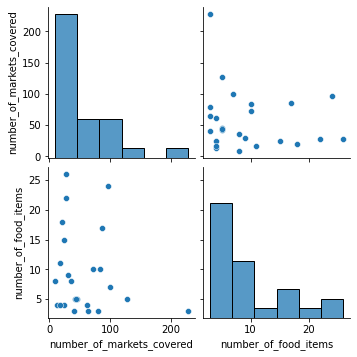

In [7]:
# Pairplot(for continuous variable)

sns.pairplot(data=data, vars=["number_of_markets_covered","number_of_food_items"])

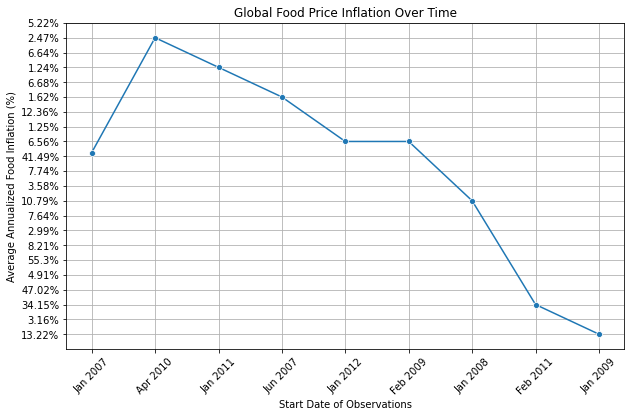

In [8]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='start_date_observations', y='average_annualized_food_inflation', data=data, marker='o', linestyle='-')
plt.xlabel('Start Date of Observations')
plt.ylabel('Average Annualized Food Inflation (%)')
plt.title('Global Food Price Inflation Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<AxesSubplot:xlabel='number_of_markets_covered', ylabel='Count'>

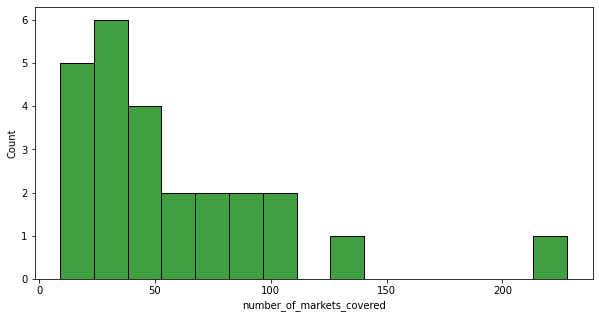

In [11]:
plt.figure(figsize = (10,5))
sns.histplot(data["number_of_markets_covered"],bins = 15,color = "g")

<AxesSubplot:xlabel='number_of_food_items', ylabel='Count'>

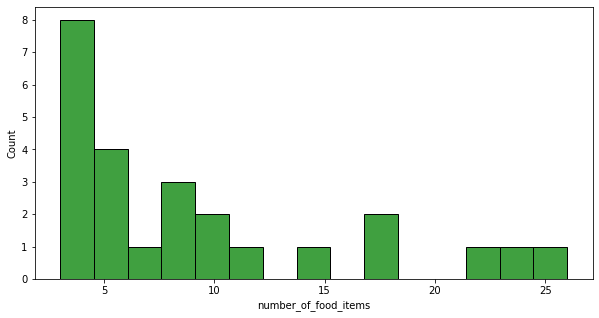

In [19]:
plt.figure(figsize = (10,5))
sns.histplot(data["number_of_food_items"],bins = 15,color = "g")

In [25]:
# Group the data by 'country' and calculate the mean of 'average_annualized_food_inflation'
country_inflation = data.groupby('country')['average_annualized_food_inflation'].mean()

In [26]:
# Sort the countries by average inflation in descending order to find the highest inflation
highest_inflation = country_inflation.sort_values(ascending=False)

In [28]:
# Sort in ascending order to find the lowest inflation
lowest_inflation = country_inflation.sort_values(ascending=True)

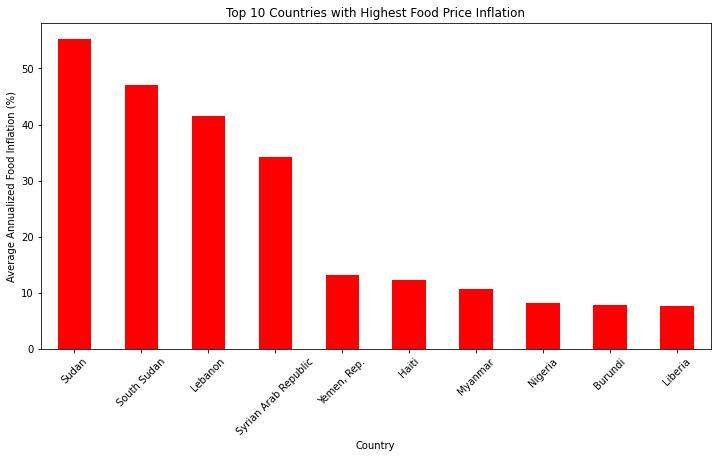

In [27]:
# Plot the top 10 countries with the highest inflation
plt.figure(figsize=(12, 6))
highest_inflation.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Countries with Highest Food Price Inflation')
plt.xlabel('Country')
plt.ylabel('Average Annualized Food Inflation (%)')
plt.xticks(rotation=45)
plt.show()

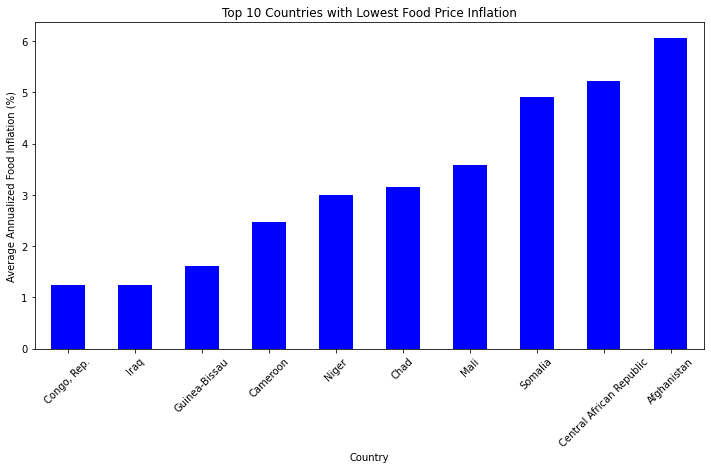

In [29]:
# Plot the top 10 countries with the lowest inflation
plt.figure(figsize=(12, 6))
lowest_inflation.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Countries with Lowest Food Price Inflation')
plt.xlabel('Country')
plt.ylabel('Average Annualized Food Inflation (%)')
plt.xticks(rotation=45)
plt.show()